# Heart Disease Prediction 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("heart.csv")
# https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
 data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.shape

(1025, 14)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1025
Number of Columns 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data_dup = data.duplicated().any()
print(data_dup)

True


In [11]:
data = data.drop_duplicates()

In [12]:
data_dup = data.duplicated().any()
print(data_dup)

False


In [13]:
data.shape

(302, 14)

In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
data.corr()
# Displays Corelation matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

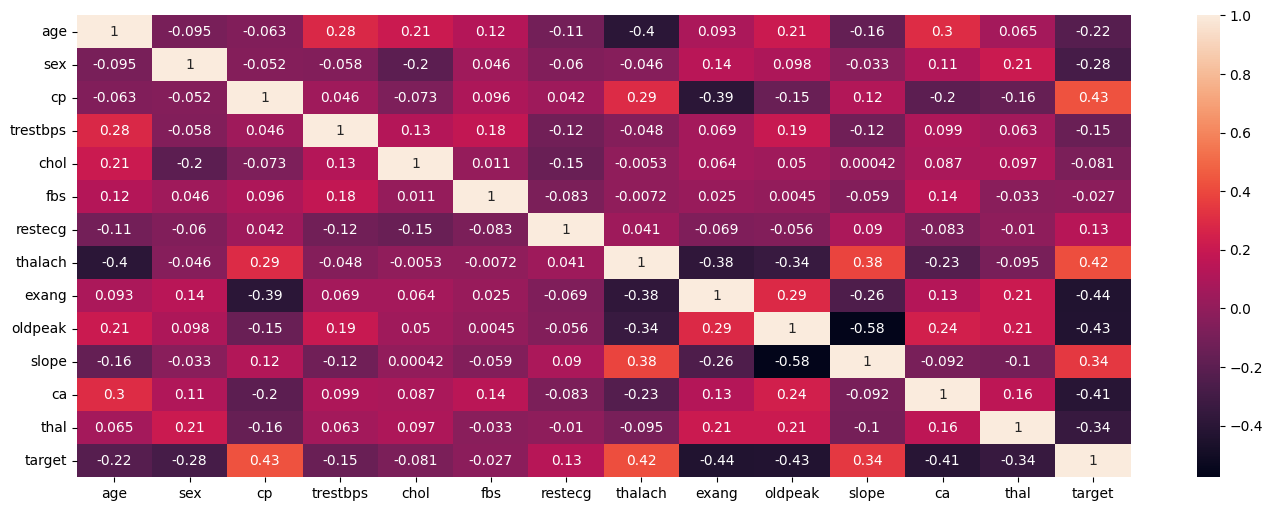

In [21]:
#Correlation in proper format in heatmap 
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(), annot=True)
# If we didn't put annot = true then the values won't appear on the heatmap 

In [22]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

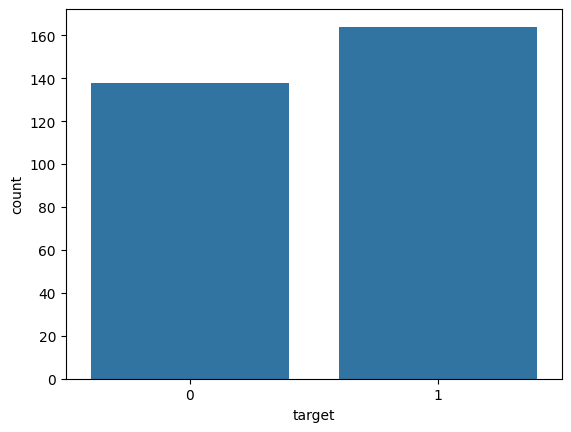

In [28]:
sns.countplot(x='target', data=data)


In [29]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

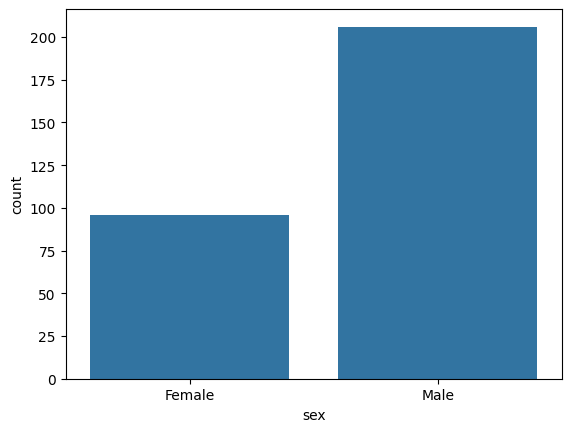

In [32]:
sns.countplot(x='sex', data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()

C:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


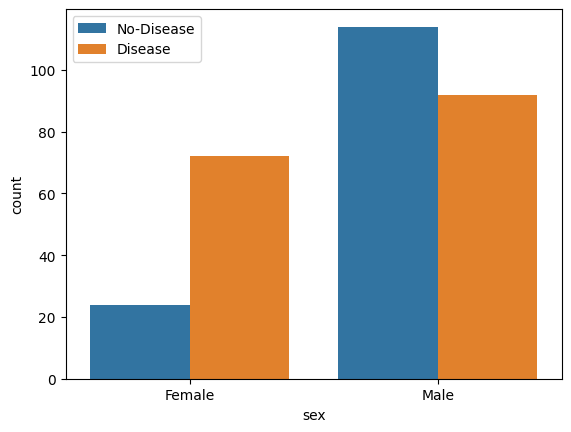

In [37]:
sns.countplot(x='sex',hue="target", data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

C:\Users\Akash\AppData\Local\Temp\ipykernel_13304\4281029158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],bins=20)


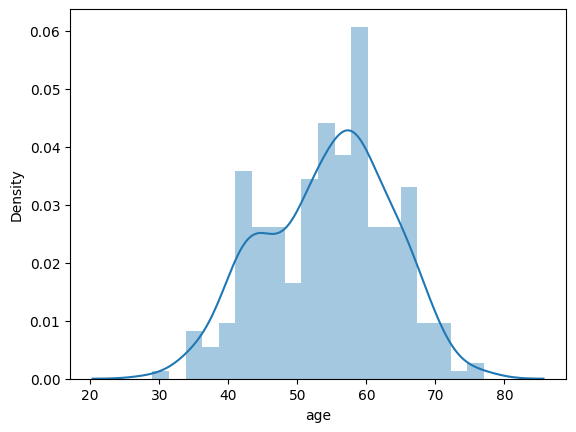

In [41]:
sns.distplot(data['age'],bins=20)
plt.show()

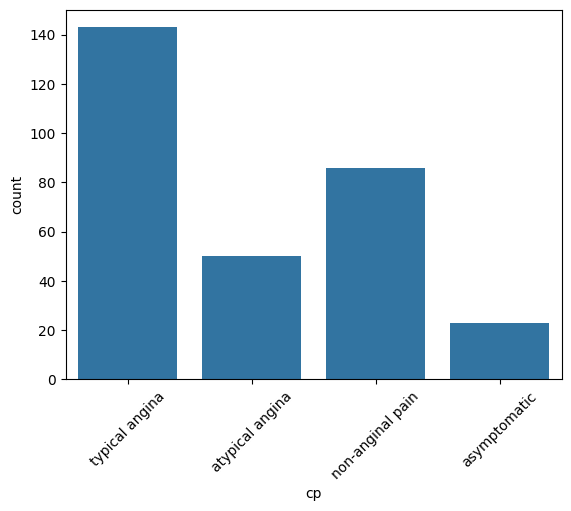

In [46]:
sns.countplot(x='cp',data=data)
plt.xticks([0,1,2,3],['typical angina','atypical angina', 'non-anginal pain','asymptomatic'])
plt.xticks(rotation=45)
plt.show()

C:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


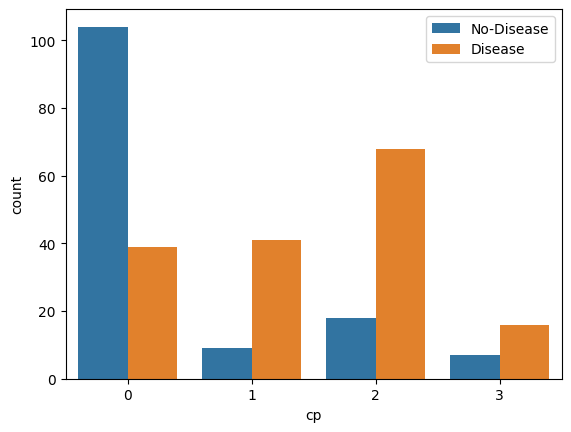

In [48]:
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

C:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


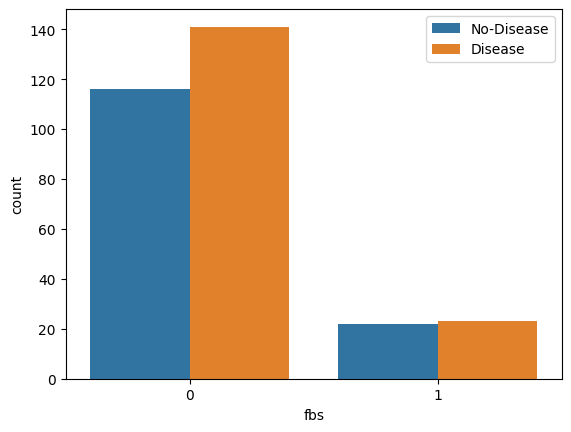

In [49]:
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

<Axes: >

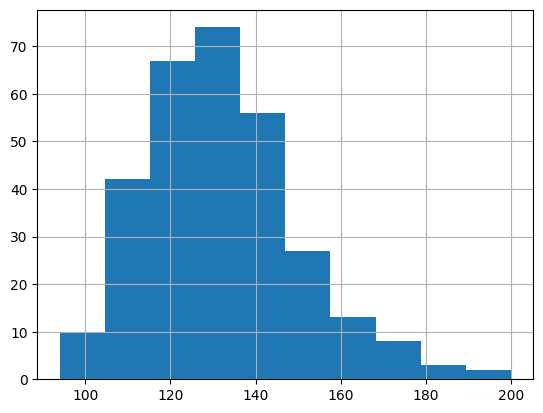

In [50]:
data['trestbps'].hist()

C:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


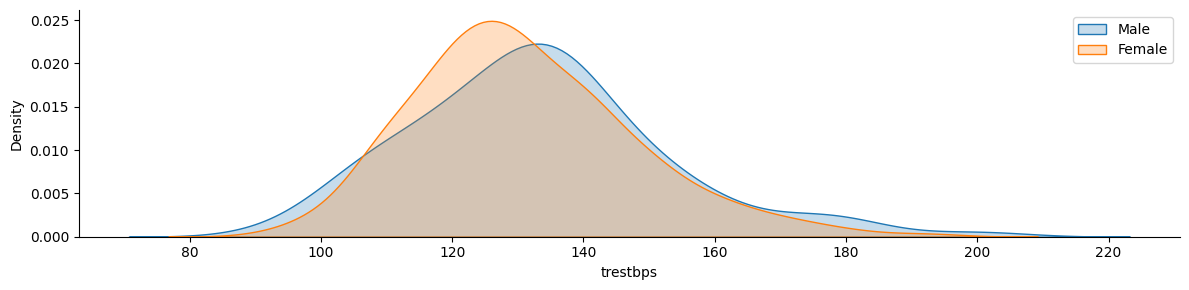

In [55]:
g = sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male' , 'Female'])
plt.show()

<Axes: >

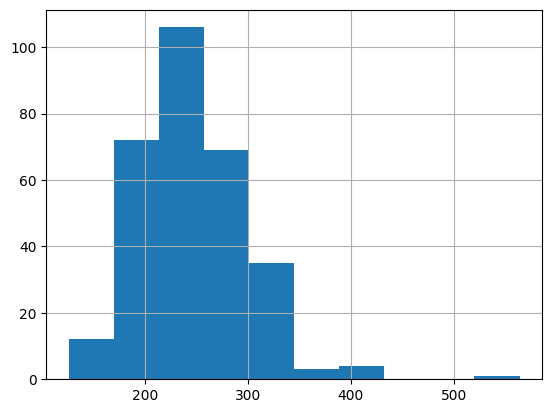

In [56]:
data['chol'].hist()

In [59]:
cate_val =[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else :
        cont_val.append(column)

In [60]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [61]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

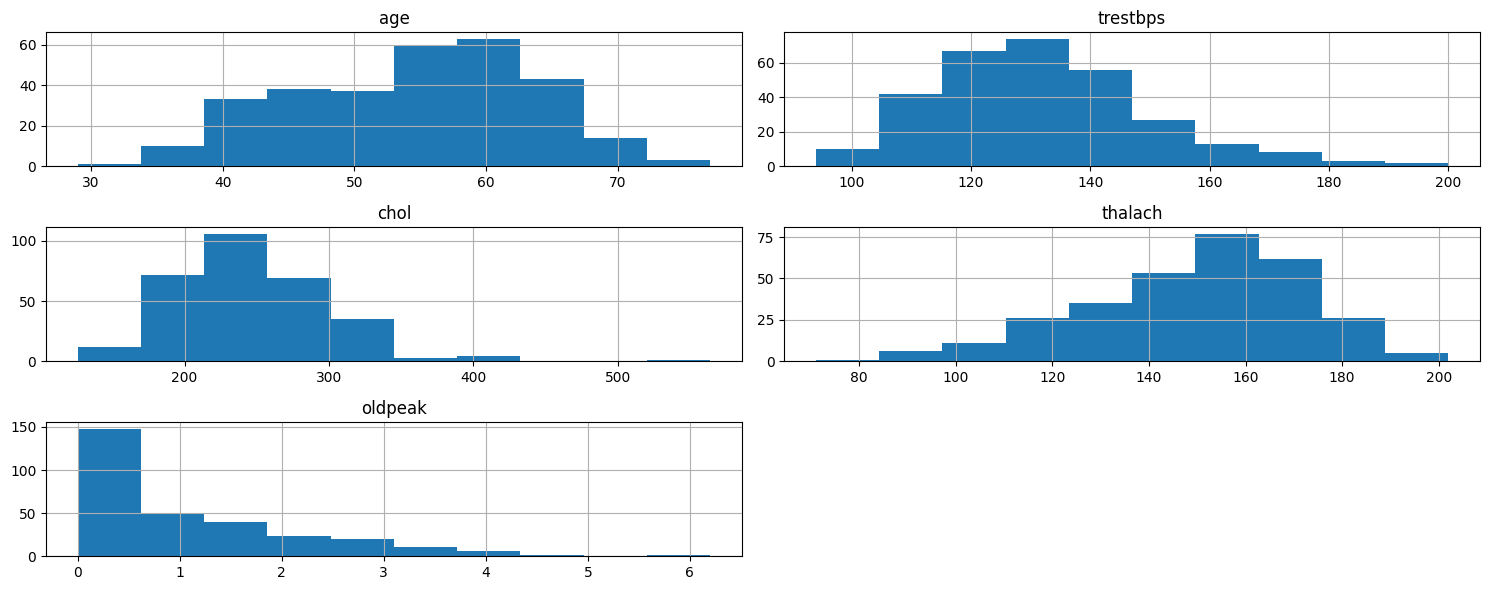

In [65]:
data.hist(cont_val,figsize = (15,6))
plt.tight_layout()
plt.show()

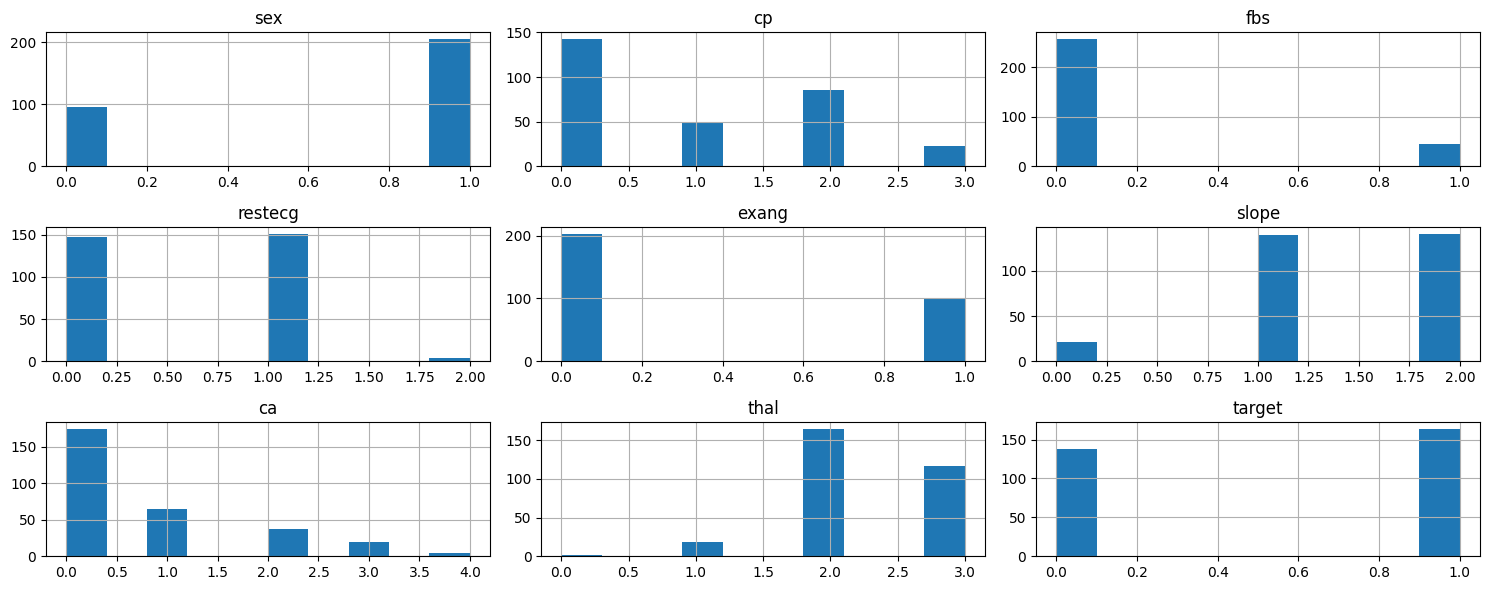

In [67]:
data.hist(cate_val,figsize = (15,6))
plt.tight_layout()
plt.show()

In [68]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [70]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [71]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# Feature Scaling 

In [72]:
# Feature scaling is used to make the features in the same scale 
# Feature scaling is important to do in the machine learning algorithms that calculate the distance between the data 

# Some of the most important Machine learning Algorithms which requires to do feature scaling are KNN , SVM's, Neural networks, Linear Regression, Logistisc Regression 
from sklearn.preprocessing import StandardScaler

In [73]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [74]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# Test Train Split 

In [75]:
#Splitting Data into training and testing 

X = data.drop('target',axis =1)

In [76]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [79]:
y = data['target']

In [80]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
X_train 

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [83]:
y_train 

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [84]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [85]:
y_test 

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [86]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# Logistic Regression 

In [89]:
from sklearn.linear_model import LogisticRegression 

In [90]:
log = LogisticRegression()

In [91]:
#training using Logistic Regression 
log.fit(X_train,y_train)

LogisticRegression()

In [92]:
y_pred1 = log.predict(X_test)

In [93]:
# Checking accuracy for the testing dataset 

from sklearn.metrics import accuracy_score

In [106]:
# We can use Shift + tab for checking the docstring of how to use that 
accuracy_score(y_test,y_pred1)

0.7868852459016393

# Support Vector Machine 

In [110]:
from sklearn import svm 

In [111]:
svm = svm.SVC()
# SVC stands for support vector classifier 

In [112]:
svm.fit(X_train,y_train)

SVC()

In [113]:
y_pred2 = svm.predict(X_test)

In [115]:
accuracy_score (y_test, y_pred2)

0.8032786885245902

# K-Neighbours Classifier 

In [118]:
from sklearn.neighbors import KNeighborsClassifier 

In [119]:
knn = KNeighborsClassifier()

In [120]:
knn.fit (X_train,y_train)

KNeighborsClassifier()

In [123]:
# y_pred3 = knn.predict(X_test)

In [124]:
# The above Line is getting error due to compatibility issues and version issues